In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import numpy as np
from numpy import (sin, cos, pi)
import matplotlib.pyplot as plt
from scipy.fftpack import (fft, fftfreq)
from scipy.signal import windows

In [17]:
road_pitch = np.load('/home/student/Desktop/Stage ENSTA/road values/pitch_velocity_values road.npy')


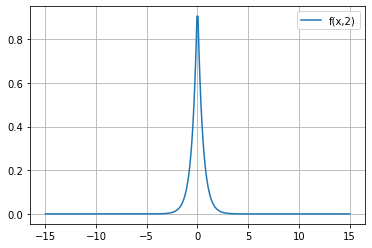

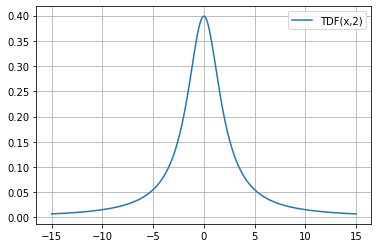

In [18]:
t = np.linspace(-15,15,300)

def f(x,a):
    return np.exp(-a*abs(x))

def TDF(t,a):
    return np.sqrt(2/np.pi)*((a)/(t**(2)+a**2))


plt.figure(1)
plt.plot(t, f(t, 2), label = f"f(x,2)")
plt.legend()
plt.grid()

plt.figure(2)
plt.plot(t, TDF(t,2), label = f"TDF(x,2)")
plt.legend()
plt.grid()

In [19]:
road_pitch_copy_2 = road_pitch
rp11 = road_pitch_copy_2[200:1000]

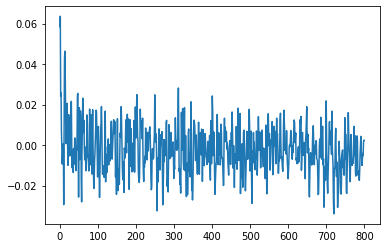

In [20]:
t = np.linspace(0,800,800)
plt.plot(t, rp11)

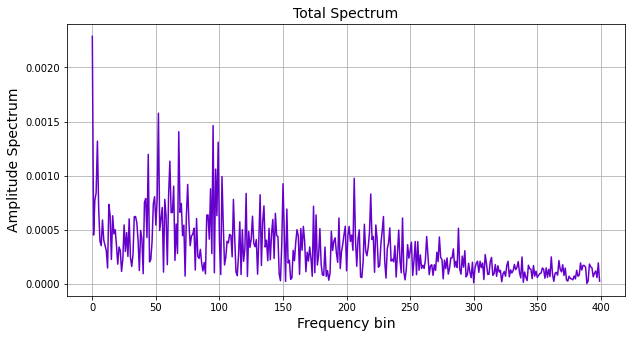

<Figure size 720x360 with 0 Axes>

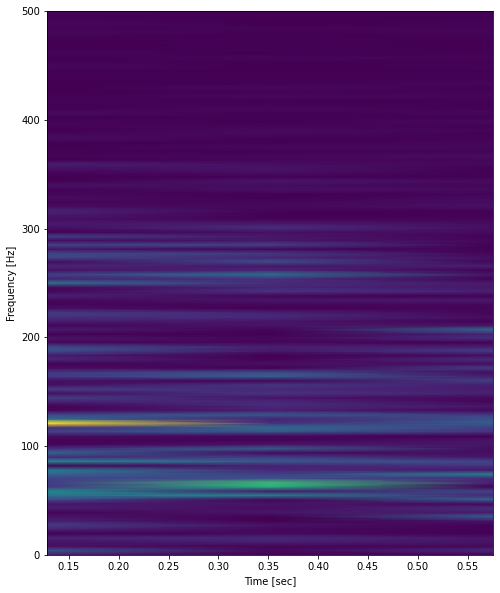

In [21]:
#@title Run section
Nfft=rp11.size

X=fft(rp11,axis=0)
X=X/Nfft
F=fftfreq(Nfft)

F_disp_id=np.where(F>=0)
plt.figure(figsize=(10,5))
plt.plot(np.absolute(X[F_disp_id]),color=[0.4,0,0.8])
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.xlabel('Frequency bin',fontsize=14)
plt.title('Total Spectrum',fontsize=14)
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
f, t, Sxx = signal.spectrogram(rp11, 1e3)
plt.figure(figsize=(8,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()



In [22]:

road_pitch_copy_2 = road_pitch
liste_sub_pitch = []
liste_vitesses = [0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.8,0.8,0.8,0.8,1.0,1.0,1.0,1.0,1.0]
print(len(liste_vitesses))
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

road_pitch_copy_2 = road_pitch
rp11 = road_pitch_copy_2[200:1000]
a, b = split_list(rp11)

liste_sub_pitch.append(a)
liste_sub_pitch.append(b)

rp12 = road_pitch_copy_2[1050:2000]
c,d = split_list(rp12)

liste_sub_pitch.append(c)
liste_sub_pitch.append(d)

rp21 = road_pitch_copy_2[2050:2500]
e,f = split_list(rp21)

liste_sub_pitch.append(e)
liste_sub_pitch.append(f)

rp22 = road_pitch_copy_2[2600:3050]
h,i = split_list(rp22)

liste_sub_pitch.append(h)
liste_sub_pitch.append(i)

rp31 = road_pitch_copy_2[3100:3550]
j,k = split_list(rp31)

liste_sub_pitch.append(j)
liste_sub_pitch.append(k)

rp32 = road_pitch_copy_2[3600:3950]
l,m = split_list(rp31)

liste_sub_pitch.append(l)
liste_sub_pitch.append(m)

rp41 = road_pitch_copy_2[4000:4300]
n,o = split_list(rp41)

liste_sub_pitch.append(n)
liste_sub_pitch.append(o)

rp42 = road_pitch_copy_2[4300:4600]
q,r = split_list(rp42)

liste_sub_pitch.append(q)
liste_sub_pitch.append(r)

rp51 = road_pitch_copy_2[4650:5000]
s,t = split_list(rp51)

liste_sub_pitch.append(s)
liste_sub_pitch.append(t)

rp52 = road_pitch_copy_2[5000:5300]
u,v = split_list(rp52)

liste_sub_pitch.append(u)
liste_sub_pitch.append(v)

21


In [23]:
liste_sub_triee = sorted(liste_sub_pitch, key = lambda x: len(x))

for i in liste_sub_triee:
    print(len(i))

#print(len(liste_sub_triee[0]))
#print(len(liste_sub_triee[-1]))


150
150
150
150
150
150
175
175
225
225
225
225
225
225
225
225
400
400
475
475


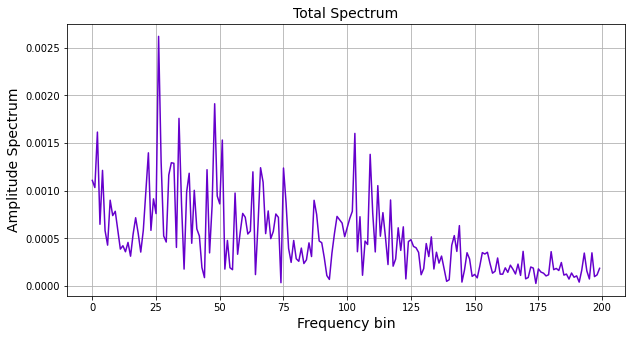

<Figure size 720x360 with 0 Axes>

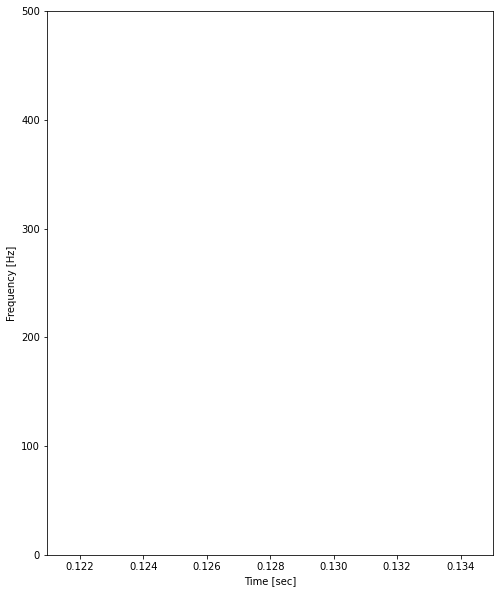

In [24]:
for data in liste_sub_pitch:
    
    Nfft=data.size

    X=fft(data,axis=0)
    X=X/Nfft
    F=fftfreq(Nfft)

    F_disp_id=np.where(F>=0)
    plt.figure(figsize=(10,5))
    plt.plot(np.absolute(X[F_disp_id]),color=[0.4,0,0.8])
    plt.ylabel('Amplitude Spectrum',fontsize=14)
    plt.xlabel('Frequency bin',fontsize=14)
    plt.title('Total Spectrum',fontsize=14)
    plt.grid()
    plt.show()

    plt.figure(figsize=(10,5))
    f, t, Sxx = signal.spectrogram(data, 1e3)
    plt.figure(figsize=(8,10))
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    break

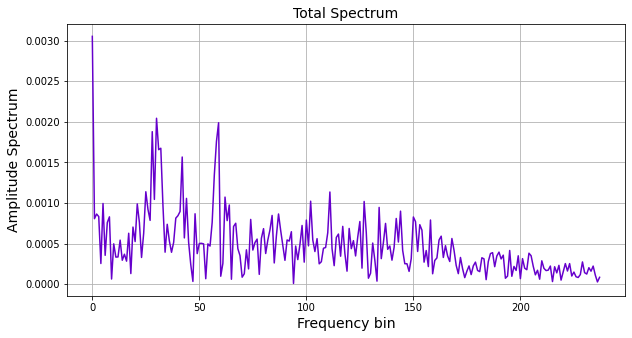

<Figure size 720x360 with 0 Axes>

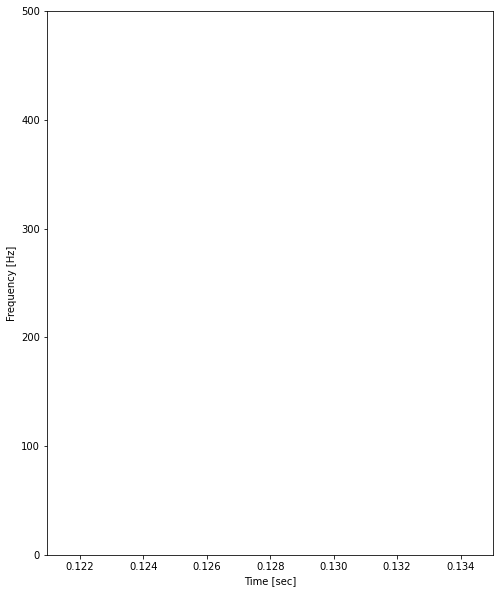

In [25]:
Nfft=liste_sub_pitch[3].size

X=fft(liste_sub_pitch[3],axis=0)
X=X/Nfft
F=fftfreq(Nfft)

F_disp_id=np.where(F>=0)
plt.figure(figsize=(10,5))
plt.plot(np.absolute(X[F_disp_id]),color=[0.4,0,0.8])
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.xlabel('Frequency bin',fontsize=14)
plt.title('Total Spectrum',fontsize=14)
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
f, t, Sxx = signal.spectrogram(liste_sub_pitch[3], 1e3)
plt.figure(figsize=(8,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<ipython-input-26-615b2903ddf9>:9: RuntimeWarning: divide by zero encountered in log
  x = np.log(abs(2*np.pi*f*t))  # Test signal


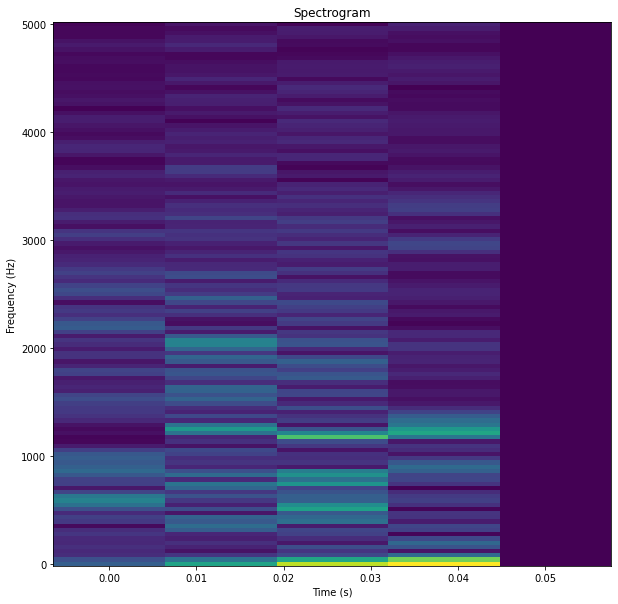

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Generate a test signal
fs = 10000  # Sample rate (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector
f = 500  # Frequency of the test signal (Hz)
x = np.log(abs(2*np.pi*f*t))  # Test signal

for data in liste_sub_pitch[1:5]:
    
    frequencies, times, Zxx = stft(data, fs)
    plt.figure(figsize=(10,10))

    # Plot the spectrogram
    plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto')
    #plt.colorbar(label='Magnitude')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
    break

In [2]:
class Spect_to_png():
    
    def __init__(self, data, frequency, idx_spec):
        
        self.data = data
        self.frequency = frequency
        self.idx_spec = idx_spec
        
    def give_and_save_spectogram(self):
        
        fs = self.frequency  # Sample rate (Hz)
        t = np.arange(0, 1, 1/fs)  # Time vector
        f = 500  # Frequency of the test signal (Hz)

        # Save the spectrogram
        frequencies, times, Zxx = stft(self.data, fs) #calling STFT function
        
        # save the spectrogram
        plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto') #creating plot
        plt.axis("off") #Deletes the axis's labels 
        plt.savefig("/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/data spectogram/" + str(self.idx_spec) + ".png", bbox_inches='tight', 
                    transparent = True, pad_inches=0) #saving data
        plt.close()
        
    def plot_spectogram(self):
        
        fs = self.frequency  # Sample rate (Hz)
        t = np.arange(0, 1, 1/fs)  # Time vector
        f = 500  # Frequency of the test signal (Hz) ?
        
        frequencies, times, Zxx = stft(self.data, fs)
        
        plt.figure(figsize=(10,10))
        plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto')
        plt.axis("off") #Deletes the axis's labels 
        plt.show()
        
    

In [3]:
frequency = 10000

for i, data in enumerate(liste_sub_pitch,0):
    
    print(i)    
    image = Spect_to_png(data, frequency, i)
    image.give_and_save_spectogram()

NameError: name 'liste_sub_pitch' is not defined

In [34]:
class get_data_from_spec(Dataset):
    
    def __init__(self, data):
    
        self.data = data
    

NameError: name 'Dataset' is not defined